In [1]:
# Importando Libs

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Gerando dados fictícios

In [4]:
def gerar_dados(n=1000):
    x = np.random.uniform(low=8, high=18, size=n)
    
    # regressão
    y = 45 * np.tanh(x / 1.7 - 7) + 57 + np.random.normal(loc=0, scale=1, size=n)
    
    return pd.DataFrame({'x': x, 'y': y})

dados = gerar_dados(1000)
dados.head()

,x,y
0,15.237058,100.853411
1,13.456120,89.454012
2,15.563387,100.639012
3,11.350835,42.125918
4,8.225569,12.623261


In [7]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures



In [19]:
X = dados['x'].values.reshape(-1, 1)
y = dados['y'].values

In [23]:
degrees = range(1, 20)
mean_squared_errors = []

kfold = KFold(n_splits=10, shuffle= True, random_state=1)

for degree in degrees:
    
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    eqm = cross_val_score(model, X= X, y= y, scoring='neg_mean_squared_error', cv=kfold )

    mean_squared_errors.append(-eqm.mean())





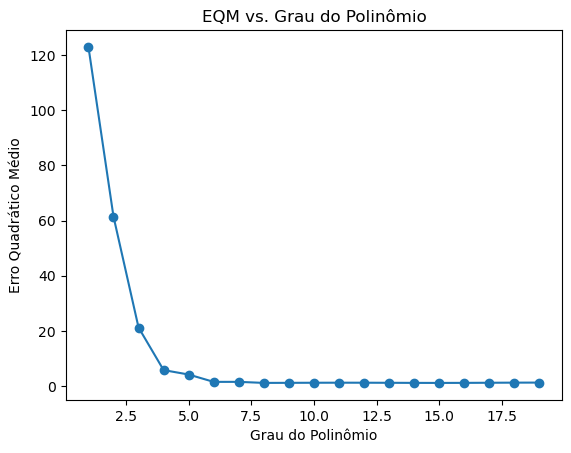

In [26]:
plt.plot(degrees, mean_squared_errors, marker='o')
plt.xlabel('Grau do Polinômio')
plt.ylabel('Erro Quadrático Médio')
plt.title('EQM vs. Grau do Polinômio')
plt.show()

In [27]:
melhor_grau = 5

model_final = make_pipeline(PolynomialFeatures(melhor_grau), LinearRegression())


In [28]:
model_final.fit(X, y)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())])

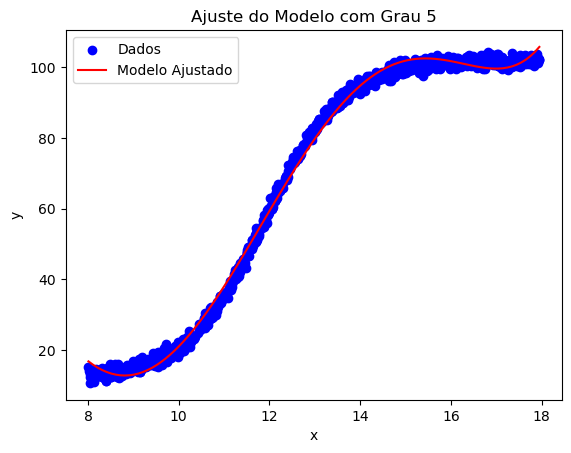

In [30]:
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred_range = model_final.predict(x_range)

# Plotar dados e ajuste do modelo
plt.scatter(X, y, color='blue', label='Dados')
plt.plot(x_range, y_pred_range, color='red', label='Modelo Ajustado')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Ajuste do Modelo com Grau {melhor_grau}')
plt.legend()
plt.show()